***Import libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")
# for encoding error add encoding='unicode_escape'

In [3]:
df.shape


(128976, 21)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
pd.isnull(df).sum()


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [8]:
df.drop(['New','PendingS'],axis=1,inplace=True)

In [9]:
df.shape

(128976, 19)

In [10]:
avg_amount = df['Amount'].mean()

# Fill null values in the 'amount' column with the calculated average
df['Amount'].fillna(avg_amount, inplace=True)

C:\Users\vasub\AppData\Local\Temp\ipykernel_20732\406152516.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(avg_amount, inplace=True)


In [13]:
pd.isnull(df).sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                    0
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [14]:
df.dropna(inplace=True)

In [19]:
df.shape

(37514, 19)

In [15]:
pd.isnull(df).sum()


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [16]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')


In [17]:
df['ship-postal-code'].dtype

dtype('int32')

In [18]:
df.rename(columns={'Qty':'Quantity'},inplace=True)


In [33]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,0,405-8078784-5731545,2006-03-11,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,March
1,1,171-9198151-1101146,2007-11-15,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,November
2,3,403-9615377-8133951,2020-04-21,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,April
3,7,406-7807733-3785945,2019-07-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship,July
4,12,405-5513694-8146768,2023-03-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship,March


In [21]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,0,405-8078784-5731545,2006-03-11,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,March
1,1,171-9198151-1101146,2007-11-15,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,November
2,3,403-9615377-8133951,2020-04-21,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,April
3,7,406-7807733-3785945,2019-07-04,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship,July
4,12,405-5513694-8146768,2023-03-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship,March


In [23]:
import random
from datetime import datetime, timedelta

# Assuming 'Date' column exists in your DataFrame df
# Define the range of dates
start_date = datetime(2000, 1, 1)
end_date = datetime(2024, 12, 31)

# Generate 128974 different dates
num_dates = 128974
different_dates = []

while len(different_dates) < num_dates:
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    different_dates.append(random_date)

# Shuffle the list of dates to ensure randomness
random.shuffle(different_dates)

# Update the existing 'Date' column with the generated dates
df['Date'] = different_dates[:len(df)]

df.to_csv('Amazon Sale Report.csv', index=False)

**Exploratory Data Analysis**

**Determining the Most Commonly Bought Size**


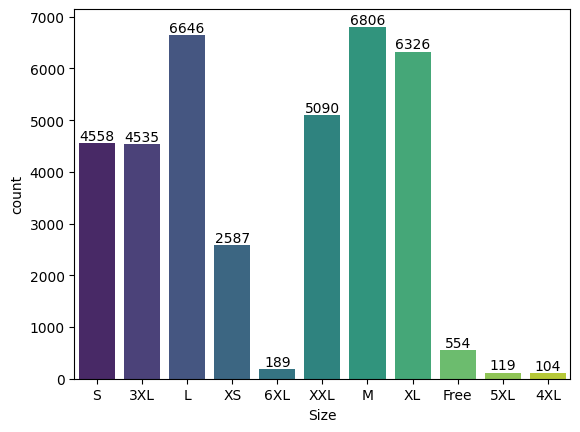

In [27]:
ax = sns.countplot(x='Size', hue='Size', data=df, palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

**Determining the Most selling Product**


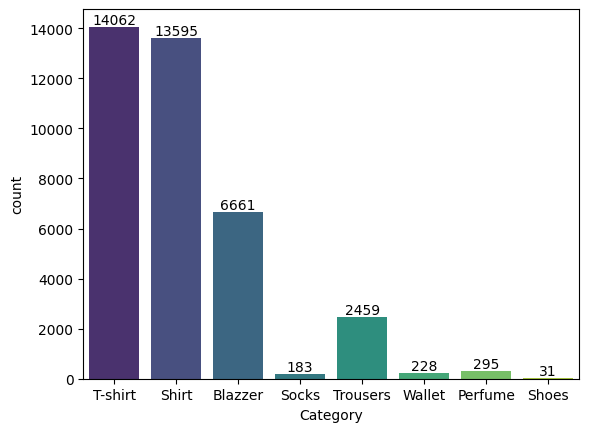

In [28]:
ax=sns.countplot(x='Category',data=df, hue='Category', palette='viridis', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
most_selling_Product = df['Category'].value_counts().idxmax()
print("The most selling Product is:", most_selling_Product)


The most selling Product is: T-shirt


***Most selling mounth***

In [30]:
# Assuming 'Date' column contains the dates in datetime format and represents the order dates
# First, ensure that the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the 'Date' column and convert it to month name
df['Month'] = df['Date'].dt.strftime('%B')

# Count the number of orders per month
monthly_orders = df['Month'].value_counts()

# Find the month with the highest number of orders
most_orders_month = monthly_orders.idxmax()

# Print the month with the most orders
print("The month with the highest number of orders is:", most_orders_month)


The month with the highest number of orders is: May


C:\Users\vasub\AppData\Local\Temp\ipykernel_20732\4110894650.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(plt.gca().get_xticklabels())  # Adjust alignment of x-axis labels


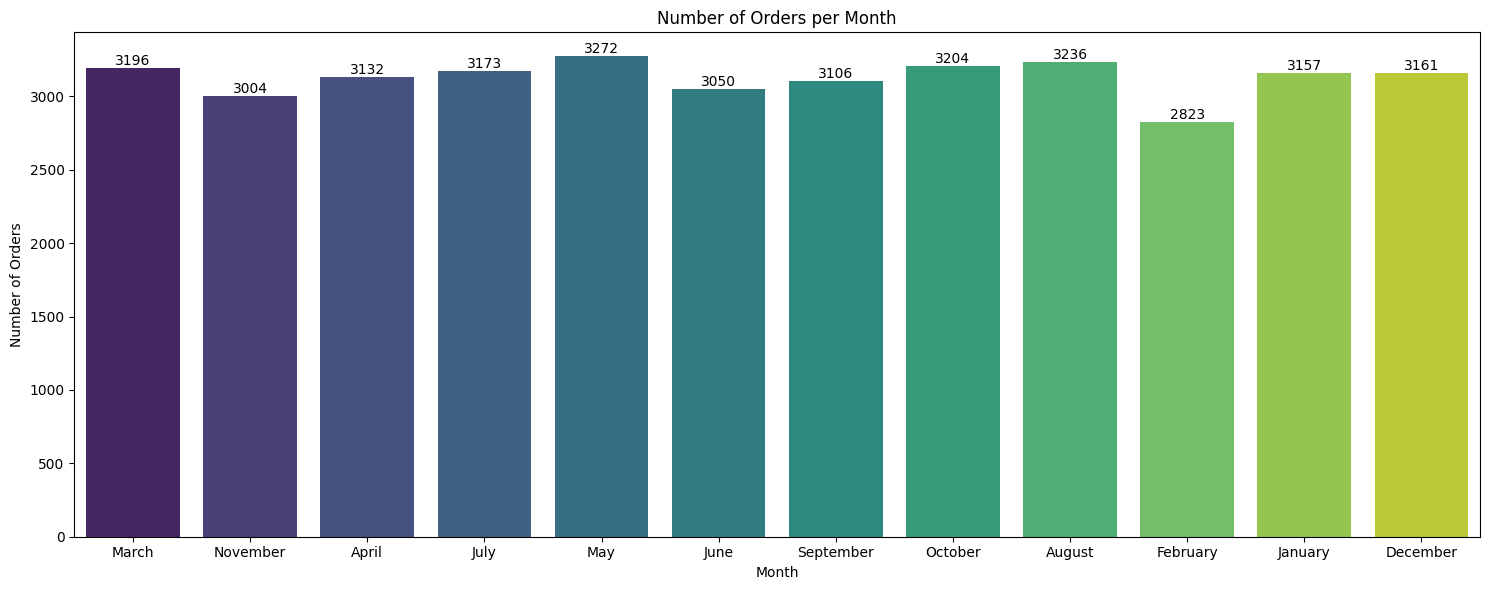

In [31]:
# Sample DataFrame with 'Date' column containing dates in datetime format
# Assuming 'Date' column contains the dates in datetime format and represents the order dates
# First, ensure that the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the 'Date' column and convert it to month name
df['Month'] = df['Date'].dt.strftime('%B')

# Get the number of unique months
num_months = len(df['Month'].unique())

# Plotting
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Month', data=df,hue='Month', order=pd.unique(df['Month']), palette='viridis', linewidth=0)
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.gca().set_xticklabels(plt.gca().get_xticklabels())  # Adjust alignment of x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()



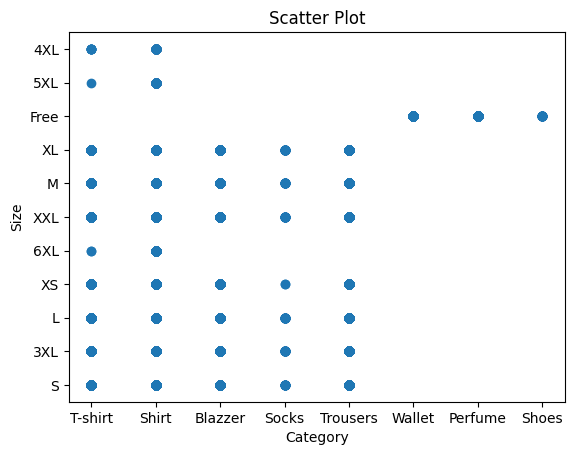

In [42]:
# Prepare data for scatter plot
x_data = df['Category'] 
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.show()

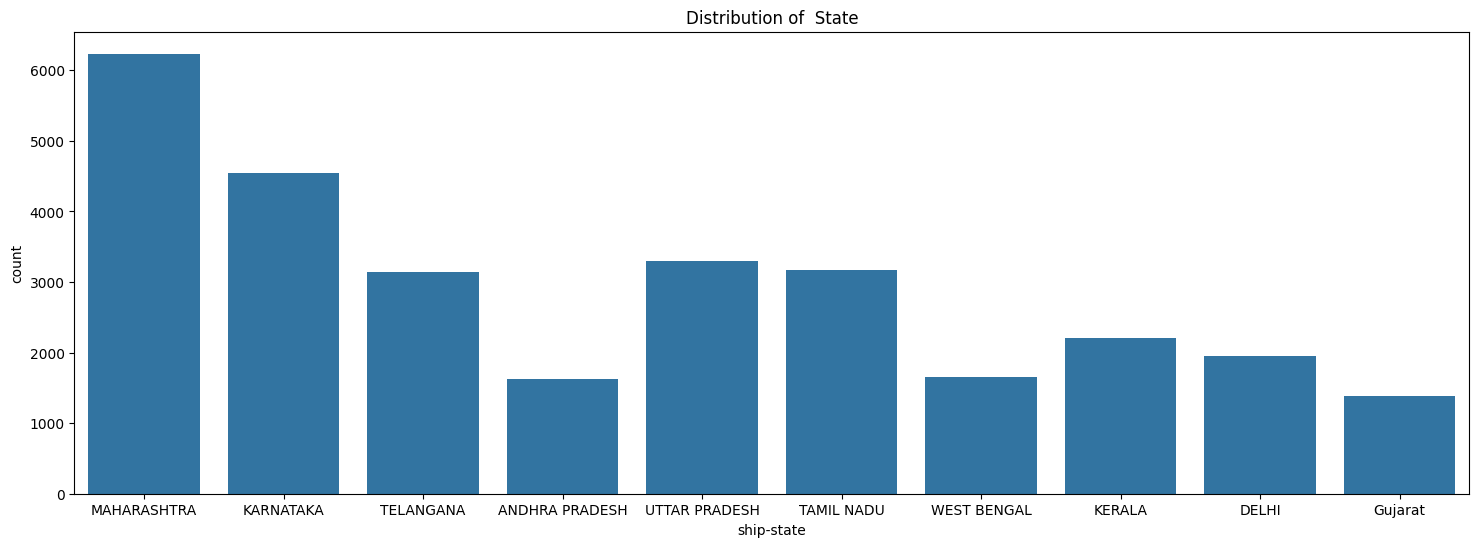

In [45]:
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(18, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=0)
plt.show()

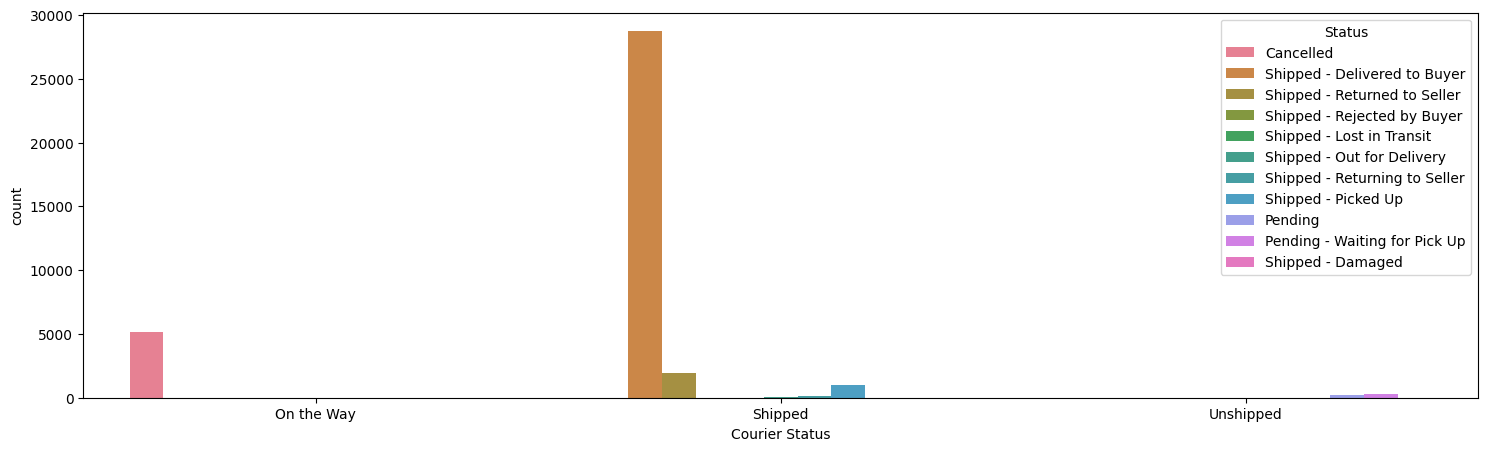

In [47]:
plt.figure(figsize=(18,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

In [48]:
# Assuming df is your DataFrame
max_price_product = df.loc[df['Amount'].idxmax()]

print("Product with maximum price:")
print(max_price_product)


Product with maximum price:
index                                        11160
Order ID                       403-4106553-1691525
Date                           2001-04-23 00:00:00
Status                Shipped - Delivered to Buyer
Fulfilment                                Merchant
Sales Channel                            Amazon.in
ship-service-level                        Standard
Category                                   T-shirt
Size                                           3XL
Courier Status                             Shipped
Quantity                                         5
currency                                       INR
Amount                                      5495.0
city                                     JALANDHAR
ship-state                                  PUNJAB
ship-postal-code                            144022
ship-country                                    IN
B2B                                           True
fulfilled-by                             Easy Ship
Mon

**Conclusion**

The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.
